In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from fast_inference import DeeplabFastApplier 
from os.path import join
import supervisely_lib as sly

%matplotlib inline

In [2]:
images_path = '/sly_task_data/data/'

In [3]:
# inference params
settings = {
    "device_id": 0,
    "gpu_devices": [
    0
  ],
  "model_classes": {
    "save_classes": "__all__",
    "add_suffix": "_dl"
  },
  "existing_objects": {
    "save_classes": [],
    "add_suffix": ""
  },
  "mode": {
    "source": "full_image"
}
}

In [4]:
applier = DeeplabFastApplier(settings)

{"message": "Will init all required to inference.", "timestamp": "2018-10-01T13:07:11.109Z", "level": "info"}
{"message": "Model input size is read (for auto-rescale).", "input_size": {"width": 513, "height": 513}, "timestamp": "2018-10-01T13:07:11.110Z", "level": "info"}
{"message": "Read model internal class mapping", "class_title_to_idx": {"background": 1, "aeroplane": 2, "bicycle": 3, "bird": 4, "boat": 5, "bottle": 6, "bus": 7, "car": 8, "cat": 9, "chair": 10, "cow": 11, "diningtable": 12, "dog": 13, "horse": 14, "motorbike": 15, "person": 16, "pottedplant": 17, "sheep": 18, "sofa": 19, "train": 20, "tv": 21}, "timestamp": "2018-10-01T13:07:11.111Z", "level": "info"}
{"message": "Read model out classes", "out_classes": [{"color": "#FF0099", "shape": "rectangle", "title": "tv"}, {"color": "#BF0073", "shape": "rectangle", "title": "train"}, {"color": "#80004D", "shape": "rectangle", "title": "sofa"}, {"color": "#B300FF", "shape": "rectangle", "title": "sheep"}, {"color": "#8600BF", 

INFO:tensorflow:Restoring parameters from /sly_task_data/model/model_weights/model.ckpt


{"message": "Weights are loaded.", "timestamp": "2018-10-01T13:07:21.838Z", "level": "info"}
{"message": "Model is ready to inference.", "timestamp": "2018-10-01T13:07:21.839Z", "level": "info"}


In [5]:
def get_imgs_list(path):
    if os.path.isdir(path):
        imgs_list = [join(path, fp) for fp in os.listdir(path)]
    else:
        imgs_list = [path]
    return imgs_list

In [6]:
# Get images list
imgs_list = get_imgs_list(images_path)

In [7]:
color_mapping = dict()
for cls in applier.train_classes._classes_lst:
    color_mapping[cls['title']] = sly.hex2rgb(cls['color'])

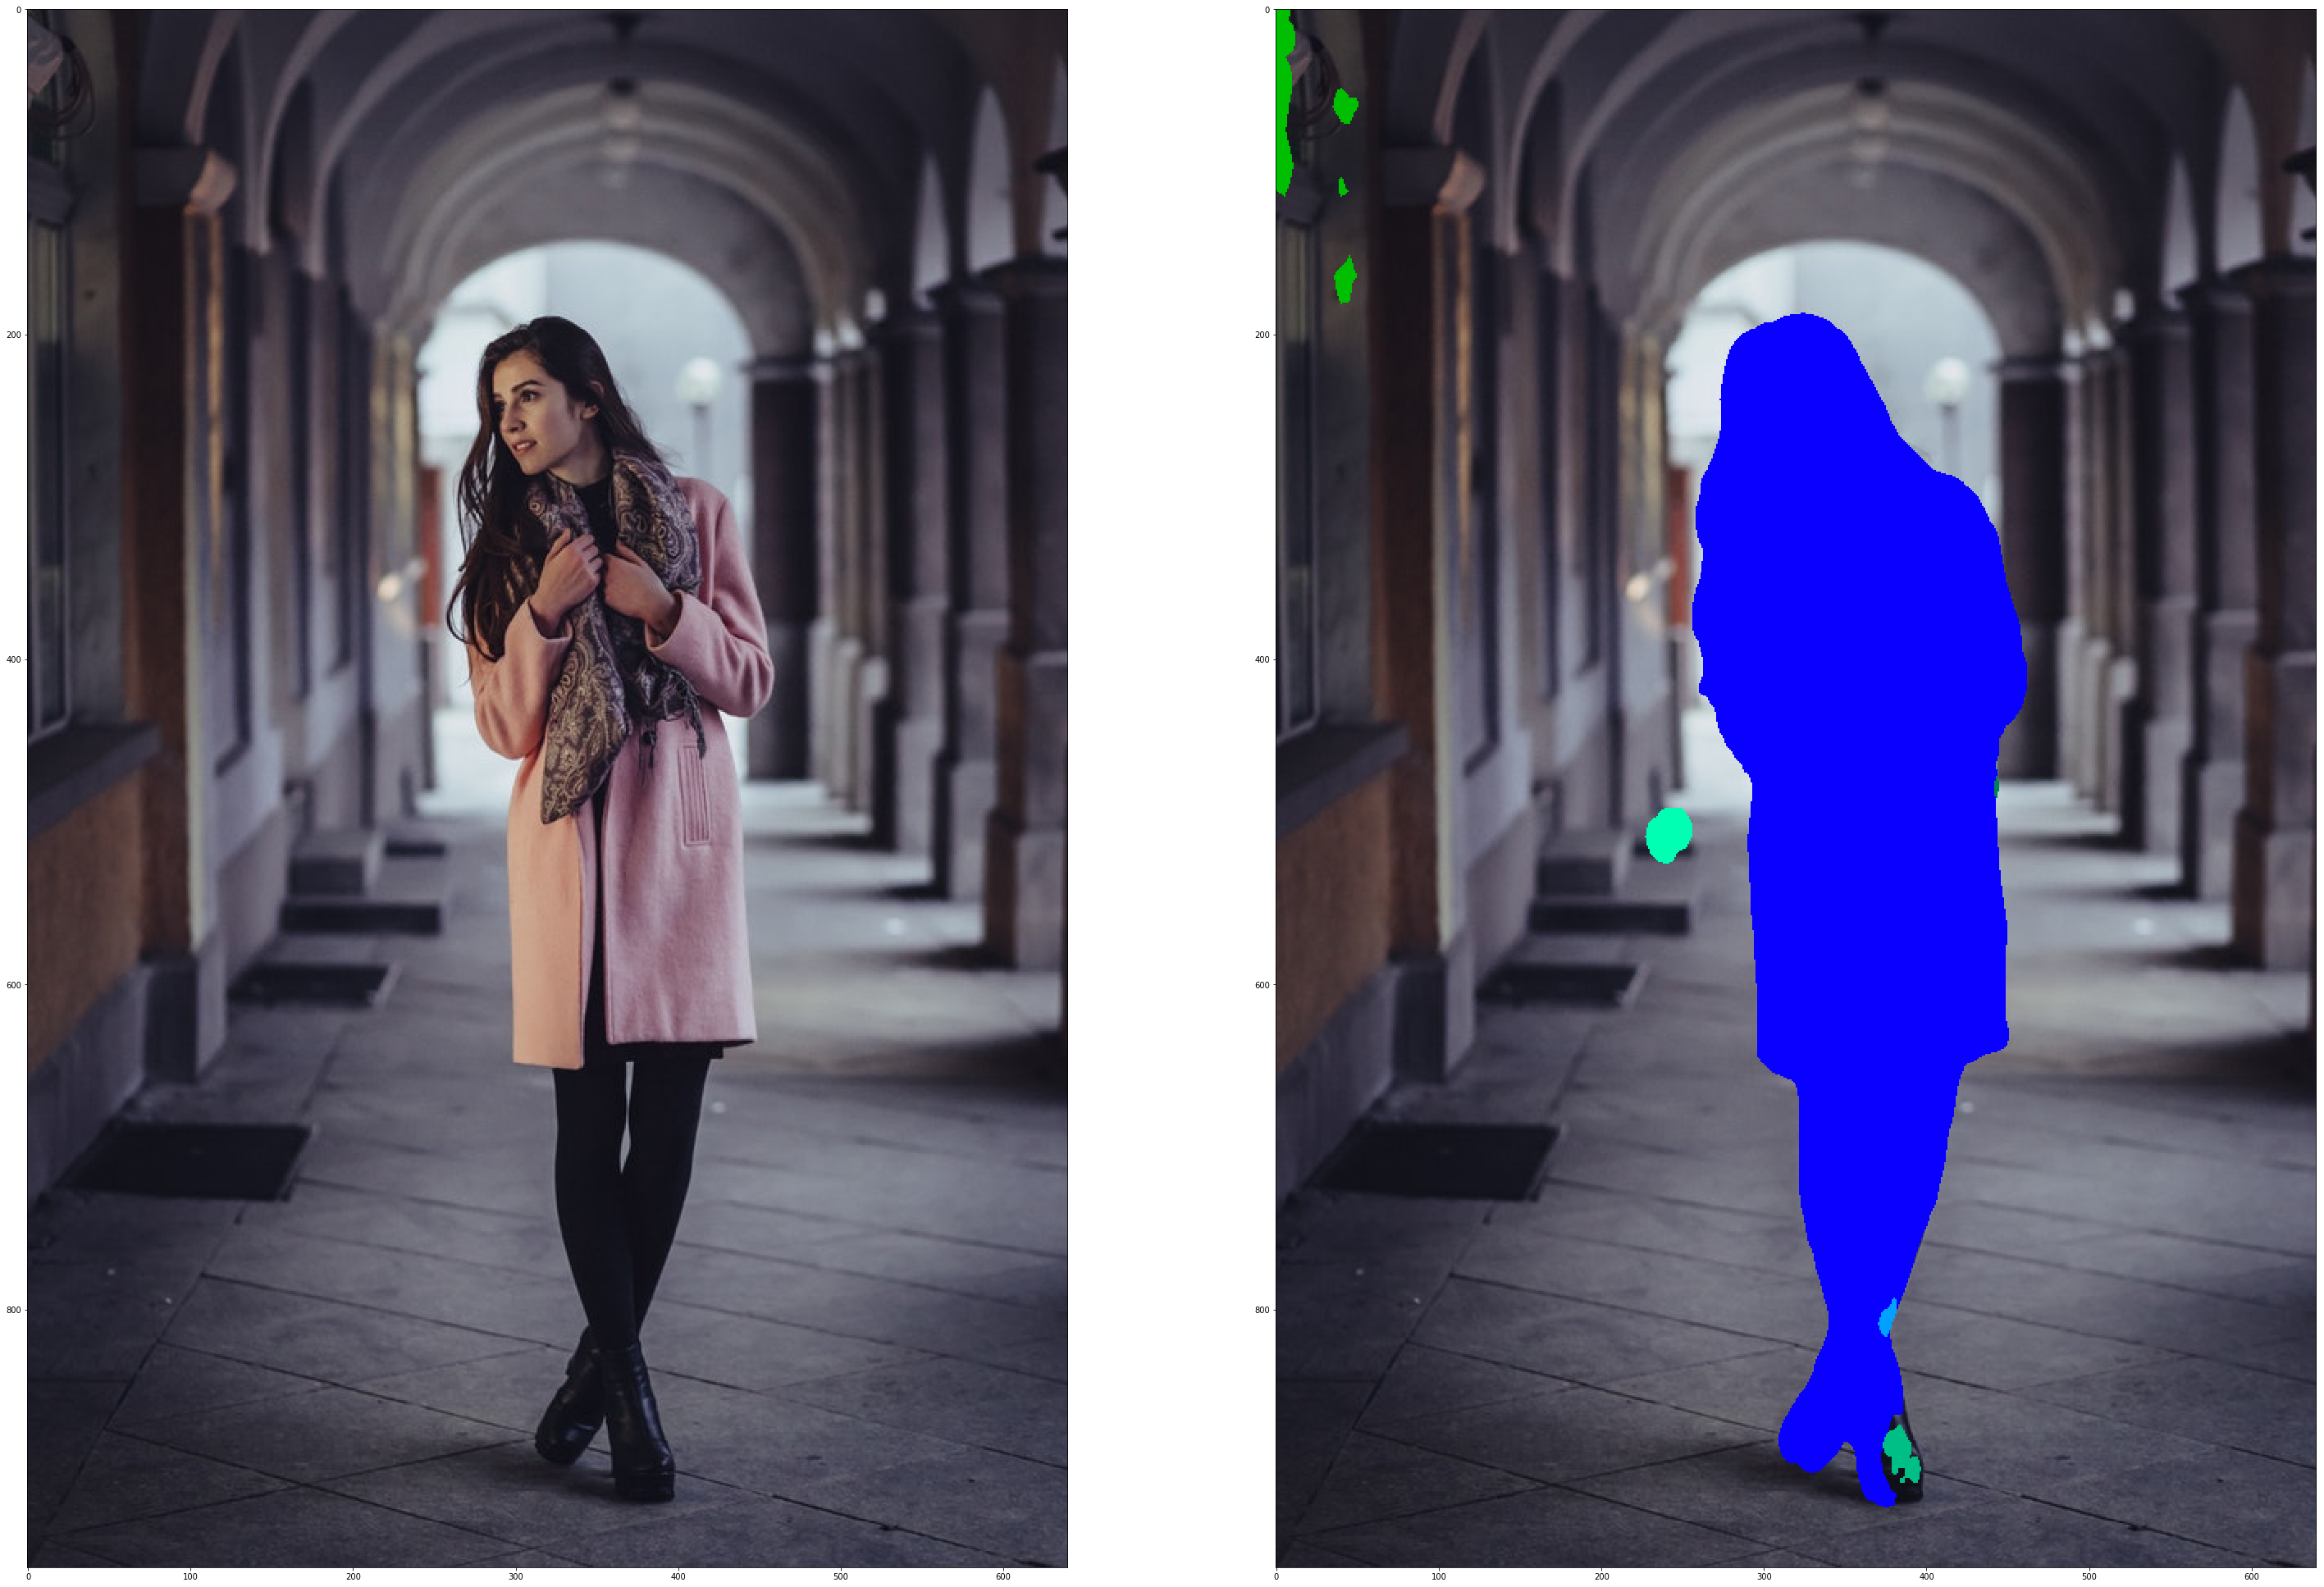

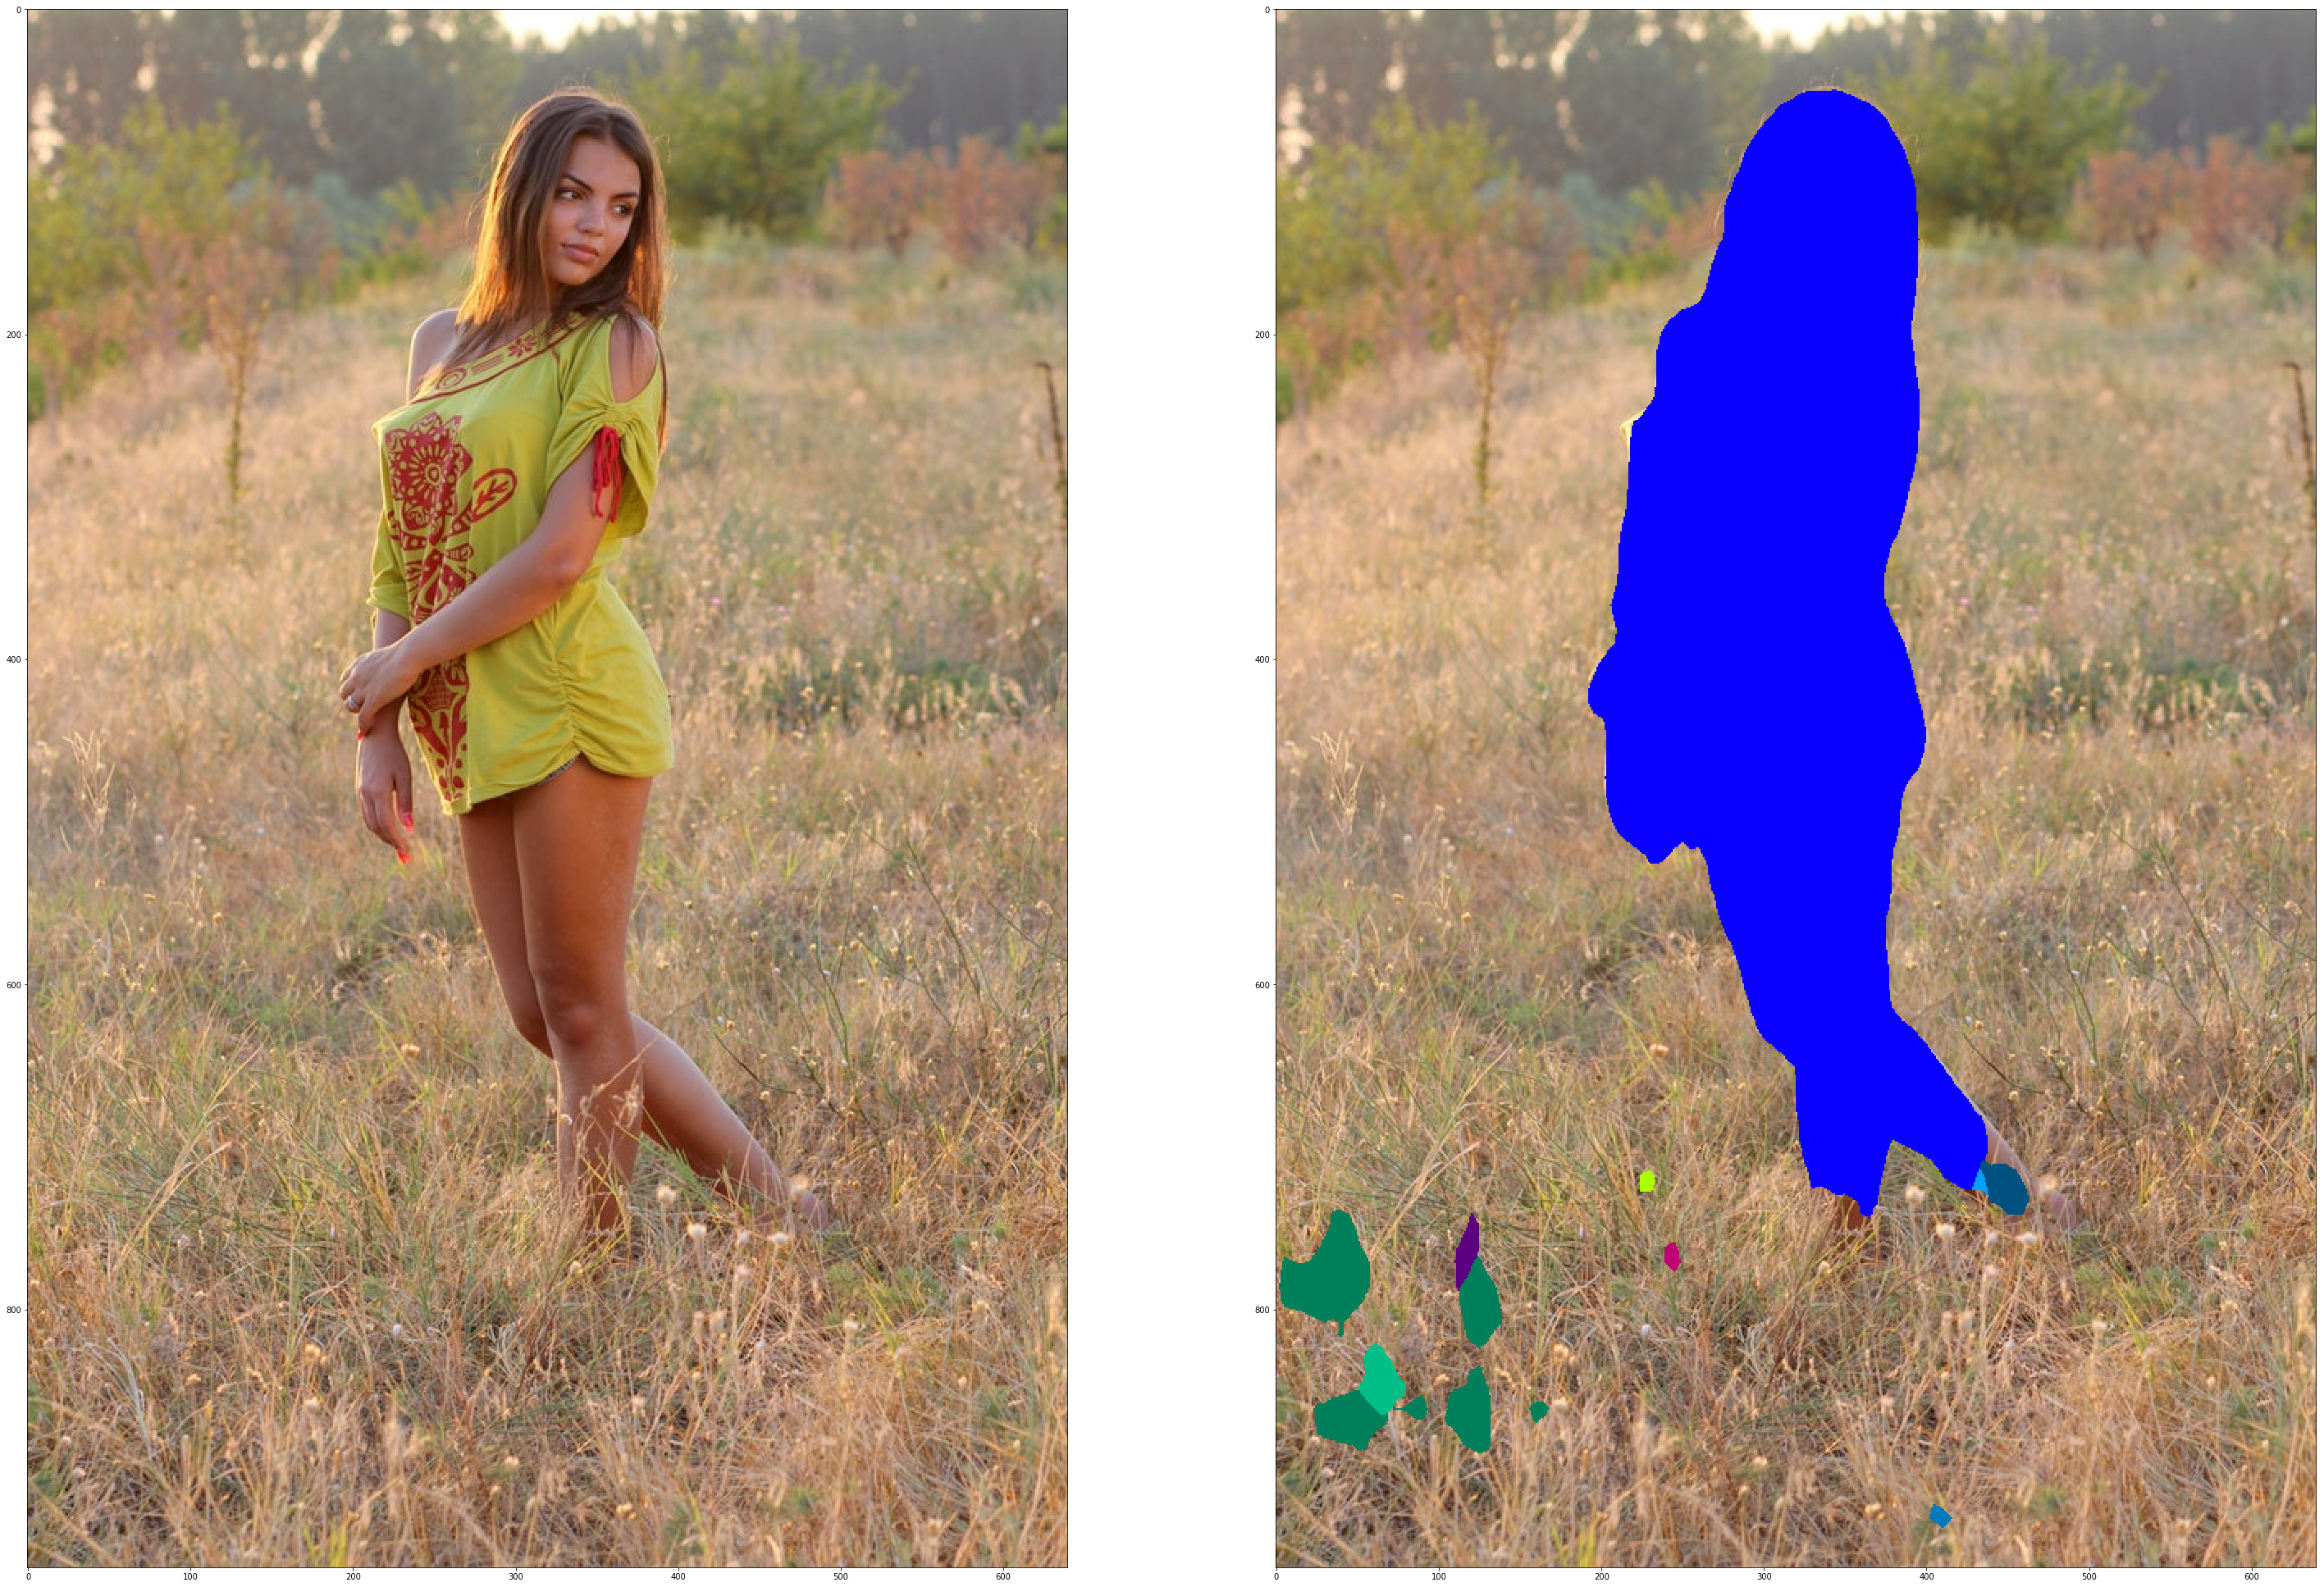

In [8]:
for img_fp in imgs_list:
    plt.figure(figsize=(50, 50))
    image = cv2.imread(img_fp)
    if image is None:
        print('Something wrong with image: {}'.format(img_fp))
        break
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,1)
    plt.imshow(image)
    mask = applier.inference(image)
    for obj in mask["objects"]:
        obj.draw(image, color_mapping[obj.class_title])
    plt.subplot(1,2,2)
    plt.imshow(image)
    plt.show()